<a href="https://colab.research.google.com/github/atulchune/EDA-Playstore-review-app-analysis/blob/main/Capstone_EDA_Play_store_review_app_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Play store review app analysis** 



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1** -Atul J chune



# **Project Summary -**

For any business to succeed these days, going digital has become paramount and getting an application for your business can lead it towards more profits. None of us can now imagine our lives without using apps in our mobile phones. Think of any problem you are facing in your life, you will find a solution of same in form of an app specially curated to fix the issue for you. As per latest Google Play stats, there are 3.48 million apps currently at the Google Play Store. The number is constantly rising as around 3,739 apps are added to the Play Store every single day.

Due to constant rising numbers of apps, it becomes imperative to understand the parameters and patterns related to app creation from a business point of view. The Play store datasets are quite intriguing as they consist of details like number of installations, app reviews, sentiment ploarity and so on. In this project we digged deeper into the datasets by doing an Exploratory Data Analysis to see certain patterns that can be helpful to different category of businesses.

We began by in-depth cleaning of the datasets and then we merged them to create one dataset. After that we did a generalised analysis to get numerous insights. We particularly focussed on the customer behaviour and what components affect the decision of the user to install the app. With the information gathered, we further tried to see if for medical category creating an app would be benefical. If so, what kinds of apps have a higher probability of being liked by the audience.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To perform exploratory data analysis (EDA) on the Google Playstore in order to understand the trends and patterns in app downloads, user ratings, and revenue generated by apps. Our main aim is to structure the data and then see numerous patterns and trends across different features. We will do a general study of dataset through visualisations and draw some preliminary conclusions. After that we will delve deeper into seeing the scope of medical apps and also the consumer behaviour in cased of apps related to the healthcare/medical category. Also we will make final conclusions about the probability of the success of a new app based on the gathered insights

Additionally, the EDA will also investigate any potential biases or limitations in the data, and make recommendations for further research to improve the understanding of the app market on the Playstore.

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

# **1. Know Your Data** 

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

### Dataset Loading

In [3]:
# import Dataset
from google.colab import drive
drive.mount('/content/Mydrive/')


Mounted at /content/Mydrive/


In [4]:
#load data
path1='/content/Mydrive/MyDrive/Capstone project/Play Store Data.csv'
path2='/content/Mydrive/MyDrive/Capstone project/User Reviews.csv'
playstore_data_df=pd.read_csv(path1)
user_rewiews_df=pd.read_csv(path2)

### Dataset First View

In [5]:
# Dataset First Look
playstore_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
user_rewiews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
playstore_data_df.shape

(10841, 13)

In [8]:
user_rewiews_df.shape

(64295, 5)

### Dataset Information

In [9]:
# Dataset Info
playstore_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
user_rewiews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
len(playstore_data_df[playstore_data_df.duplicated()])

483

In [12]:
len(user_rewiews_df[user_rewiews_df.duplicated()])

33616

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
print(playstore_data_df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [14]:
print(user_rewiews_df.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


<Axes: >

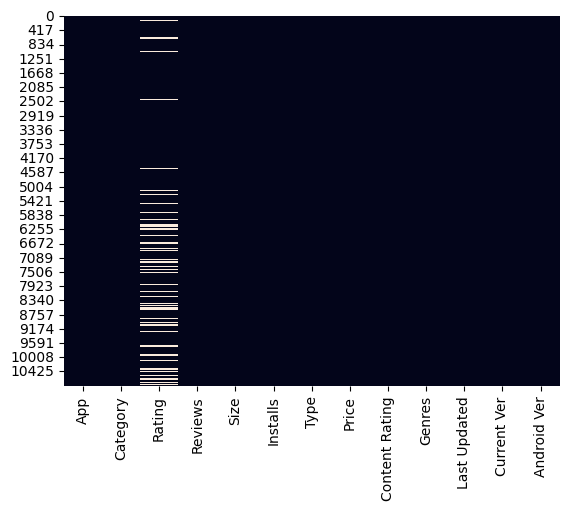

In [15]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(playstore_data_df.isnull(), cbar=False)

This shows that the data has many missing values under the column Rating.
some missing values in column Content Rating and Android Version

<Axes: >

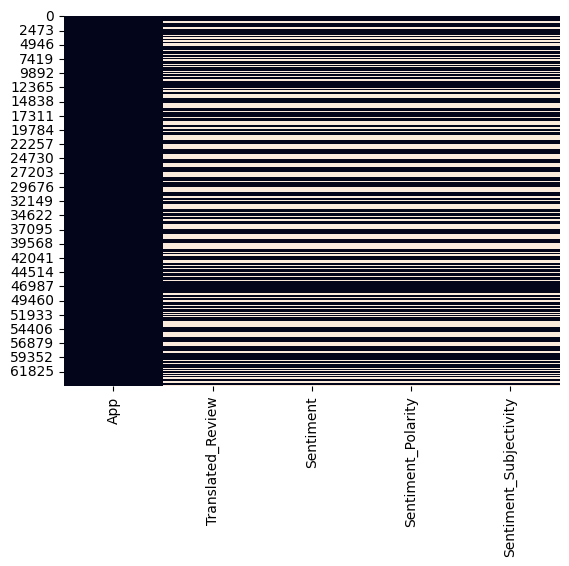

In [16]:
sns.heatmap(user_rewiews_df.isnull(), cbar=False)

This also shows that even the User Reviews csv is also full of missing data

### What did you know about your dataset?

The two datasets given one is about playstore apps information and other is about different apps and users rewiews.
**Dataset1**(playstore_data_df) consists of 10841 rows and 13 columns.In this 483 values are duplicated and 1487 null values.
**Dataset2**(user_rewiews_df) consists of 64295 rows and 5 columns .In this 33616 values are duplicated and in each columns except app column consists 26868 null values.
Both the datasets consists data of type object and float64.

# **2. Understanding Your Variables**

In [17]:
# Dataset Columns
playstore_data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [18]:
user_rewiews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [19]:
# Dataset Describe
playstore_data_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [20]:
user_rewiews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


## **Variables Description**

### **Dataset1- Playstore data**

 **1.App:**  Name of App      
 **2.Category:**  a group of apps that have similar features, functionality, and themes            
 **3.Rating:**   a score or measurement of how good or popular it is.out of 5 rating given by user      
 **4.Reviews:**  Count of reviews given by users       
 **5.Size:**    The memory size needed to install the application.          
 **6.Installs:** The number of times each application has been installed by users        
 **7.Type:**   either it is paid or free        
 **8.Price:**  if paid then price          
 **9.Content Rating**: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.  
 **10.Genres:** The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example         
 **11.Last Updated:** Release date of the most recent update for the app    
 **12.Current Ver:** Current version of the app available on Play Store     
 **13.Android Ver:**The oldest version of Android OS supported by the app.  


### **Dataset2- Users rewiews**

  **1.App:**  Name of the app.                  
  **2.Translated_Review:** Either the original review in English, or a translated version if the orignal review is in another language.       
  **3.Sentiment:** The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral or Negative.       
  **4.Sentiment_Polarity:** A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive). Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e. it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.     
  **5.Sentiment_Subjectivity:** A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements. 

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
playstore_data_df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [22]:
# Number of unique names of app
playstore_data_df['App'].nunique()

9660

In [23]:
playstore_data_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [24]:
playstore_data_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [25]:
playstore_data_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [26]:
playstore_data_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [27]:
playstore_data_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [28]:
playstore_data_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [29]:
playstore_data_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [30]:
user_rewiews_df['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [31]:
user_rewiews_df['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,         nan, ..., -0.52857143,
       -0.37777778,  0.17333333])

In [32]:
user_rewiews_df['Sentiment_Subjectivity'].unique()

array([0.53333333, 0.28846154,        nan, ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

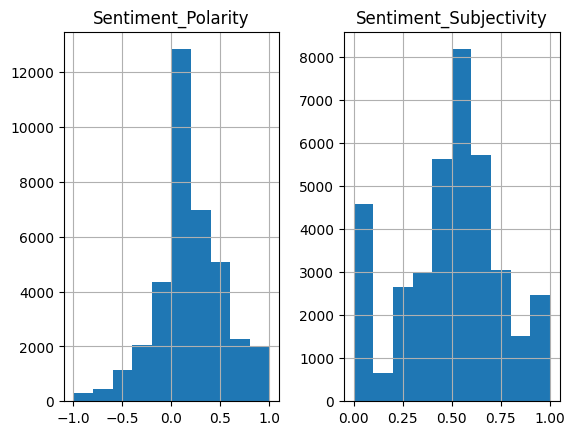

In [33]:
user_rewiews_df.hist();

The value of Sentiment_Polarity ranges between [-1.0,1.0] and Sentiment_Subjectivity ranges between [0.00,1.00]

# **3. Data Wrangling**

 **In this step we are going to:**

**(1) Remove unnecessary columns and rows**

**(2) Check the data type of variables and if required convert them**

**(3) Remove dupplicate and repetative entries if any**

**(4) Treat null values**  


In [34]:
# Making copy of datasets
df1=playstore_data_df.copy()
df2=user_rewiews_df.copy()

### **(1) Remove unnecessary columns and rows**

In [35]:
df1[(df1['Category'] == '1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This column has wrong values which lead problem in data manupulation

In [36]:
df1.drop(10472,axis=0,inplace=True)

### **(2)Check the data type of variables and if required convert them**

In [37]:
# Checking the datatype of variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Column 'Reviews', 'Size', 'Installs' and 'Price' have the type- 'object'. Hence, we will need to do some data cleaning. We also need to change 'Last updated' column type to datetime.

In [38]:
#For 'Reviews'
# CONVERTING REVIEWS COLUMNS DATA TYPE TO int
df1['Reviews'] =df1['Reviews'].astype(int)
df1['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64

In [39]:
# For 'Installs'
# CHANGING DTYPE OF 'INSTALLS' COLUMN TO int
df1['Installs'] = df1['Installs'].str.replace(',','')
df1['Installs'] = df1['Installs'].str.replace('+','')
df1['Installs'] = df1['Installs'].astype(int)
df1['Installs']

<ipython-input-39-40d9c5542469>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Installs'] = df1['Installs'].str.replace('+','')


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

In [40]:
#For 'Price'
# REMOVING '$' SIGN FROM 'PRICE' COLUMN AND CONVERT DTYPE TO FLOAT
df1['Price'] = df1['Price'].str.replace('$','')
df1['Price'] = df1['Price'].astype(float)
df1['Price']

<ipython-input-40-f36d96657697>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Price'] = df1['Price'].str.replace('$','')


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [41]:
df1['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB. To analyse this column we will convert all the units to MB to easily understand and analyze.

In [42]:
# USER-DEFINED FUNCTION TO CONVERT KB TO MB

def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4) #as we know 1MB = 1024KB
    else:
      return val
  except:
    return val

Applying the kb_to_mb function to convert the values in the Size column to a single unit of measure (MB) and the datatype from string to float.

In [43]:
df1['Size'] = df1['Size'].apply(lambda x: convert_kb_to_mb(x))
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [44]:
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(x))

In [45]:
df1['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     0.0
10840    19.0
Name: Size, Length: 10840, dtype: float64

We successfully converted the 'Size' column datatype to float.

In [46]:
# We have to change this column to datetime
df1["Last Updated"] = pd.to_datetime(df1['Last Updated'])

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


### **(3)Remove dupplicate and repetative entries if any**

In [48]:
#Dropping/Deleting the duplicate values in playstore dataset
df1.drop_duplicates(inplace = True)
df1.shape

(10357, 13)

Now let us ensure that one app should have one row/observation only. After removing duplicates, we have left 10357 rows, which means number of unique apps should also be the same. Let's find out

In [49]:
# Checking number of unique apps
df1['App'].nunique()

9659

Number of unique apps in the dataset are 9660 but still there are 696 extra entries. Let's find out what is leading us to this discrepancy.

In [50]:
df1['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9659, dtype: int64

In [51]:
df1.loc[df1['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [52]:
df1.loc[df1['App'] == 'ROBLOX']['Reviews'].max()

4450890

Here we can see that there are many apps having multiple entries even after removing duplicates such as 'ROBLOX'. After observation we found that these entries differ in terms of number of reviews. These must have been from different points of time. We are going to keep only that row which has highest number of reviews, assuming it to be the latest one.

In [53]:
# Keeping only that row for each app which has the highest number of reviews
df1 = df1.loc[df1.groupby('App')['Reviews'].idxmax(),:]
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6000,500,Free,0.00,Everyone,Sports,2017-10-07,0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22.0000,1000000,Free,0.00,Everyone,Social,2018-08-02,5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1000,10000,Free,0.00,Mature 17+,Comics,2018-07-13,5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,0.1982,10000,Free,0.00,Everyone,Tools,2014-09-16,1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53.0000,10000,Free,0.00,Mature 17+,Communication,2018-07-03,4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59.0000,100000,Free,0.00,Mature 17+,Video Players & Editors,2018-07-18,4.0.7,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0000,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18.0000,1000000,Free,0.00,Everyone,Social,2018-07-24,4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2000,10000,Free,0.00,Everyone,Tools,2017-10-21,1.0,4.2 and up


### **(4) Treat null values**

**1. Android Ver: There are a total of 2 NaN values in this column.**

In [54]:
df1.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [55]:
# DROPPING THE ROWS CORRESPONDING TO THE NaN VALUES IN THE 'ANDROID VER' COLUMN
df1=df1[df1['Android Ver'].notna()]


**2. Current Ver: There are a total of 8 NaN values in this column.**

In [56]:
#DROPPING ROWS CORRESPONDING TO THE VALUES WHICH CONTAIN NaN IN THE COLUMN 'CURRENT VER'

df1=df1[df1["Current Ver"].notna()]

**3. Type: There is only one NaN value in this column.**

In [57]:
# THE ROW CONTAINING NaN VALUES IN THE TYPE COLUMN
df1[df1["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,0.0,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [58]:
# Since this row does not have much information in other aspects too, we are going to remove it.
df1.drop(9148,axis=0,inplace=True)


**4. Rating: This column contains 1461 NaN values.**

we know that the rating of any app in the Play Store will be in between 1 and 5. Let us check whether there are any ratings out of this range.

In [59]:
df1[(df1['Rating'] <1) | (df1['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


The Rating column contains 1461 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis. The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column

In [60]:
# FINDING MEAN AND MEDIAN IN THE RATING COLUMN EXCLUDING THE NaN VALUES

mean_rating = round(df1[~df1['Rating'].isnull()]['Rating'].mean(),4)

median_rating = df1[~df1['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1733, 4.3]

Visualization of distribution of rating using displot and detecting the outliers through boxplot.

<ipython-input-61-c91388c18e38>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Rating'],color='firebrick',ax=ax[0])


<Axes: xlabel='Rating'>

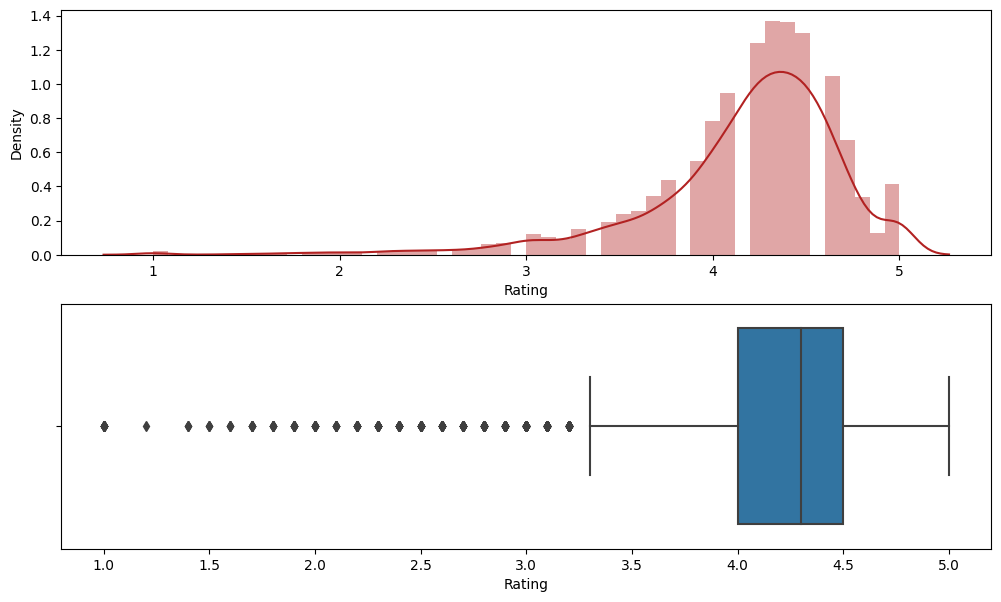

In [61]:
df1.isnull().sum()
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(df1['Rating'],color='firebrick',ax=ax[0])
sns.boxplot(x='Rating',data=df1, ax=ax[1])

The mean of the average ratings (excluding the NaN values) comes to be 4.18.

The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.

From the distplot visualizations, it is clear that the ratings are left skewed.

We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

Hence we will impute the NaN values in the Rating column with its median

In [62]:
# REPLACING THE NaN VALUES IN THE 'RATING' COLUMN WITH ITS MEDIAN VALUE
df1['Rating'].fillna(value=median_rating,inplace=True)
df1.shape

(9648, 13)

In [63]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

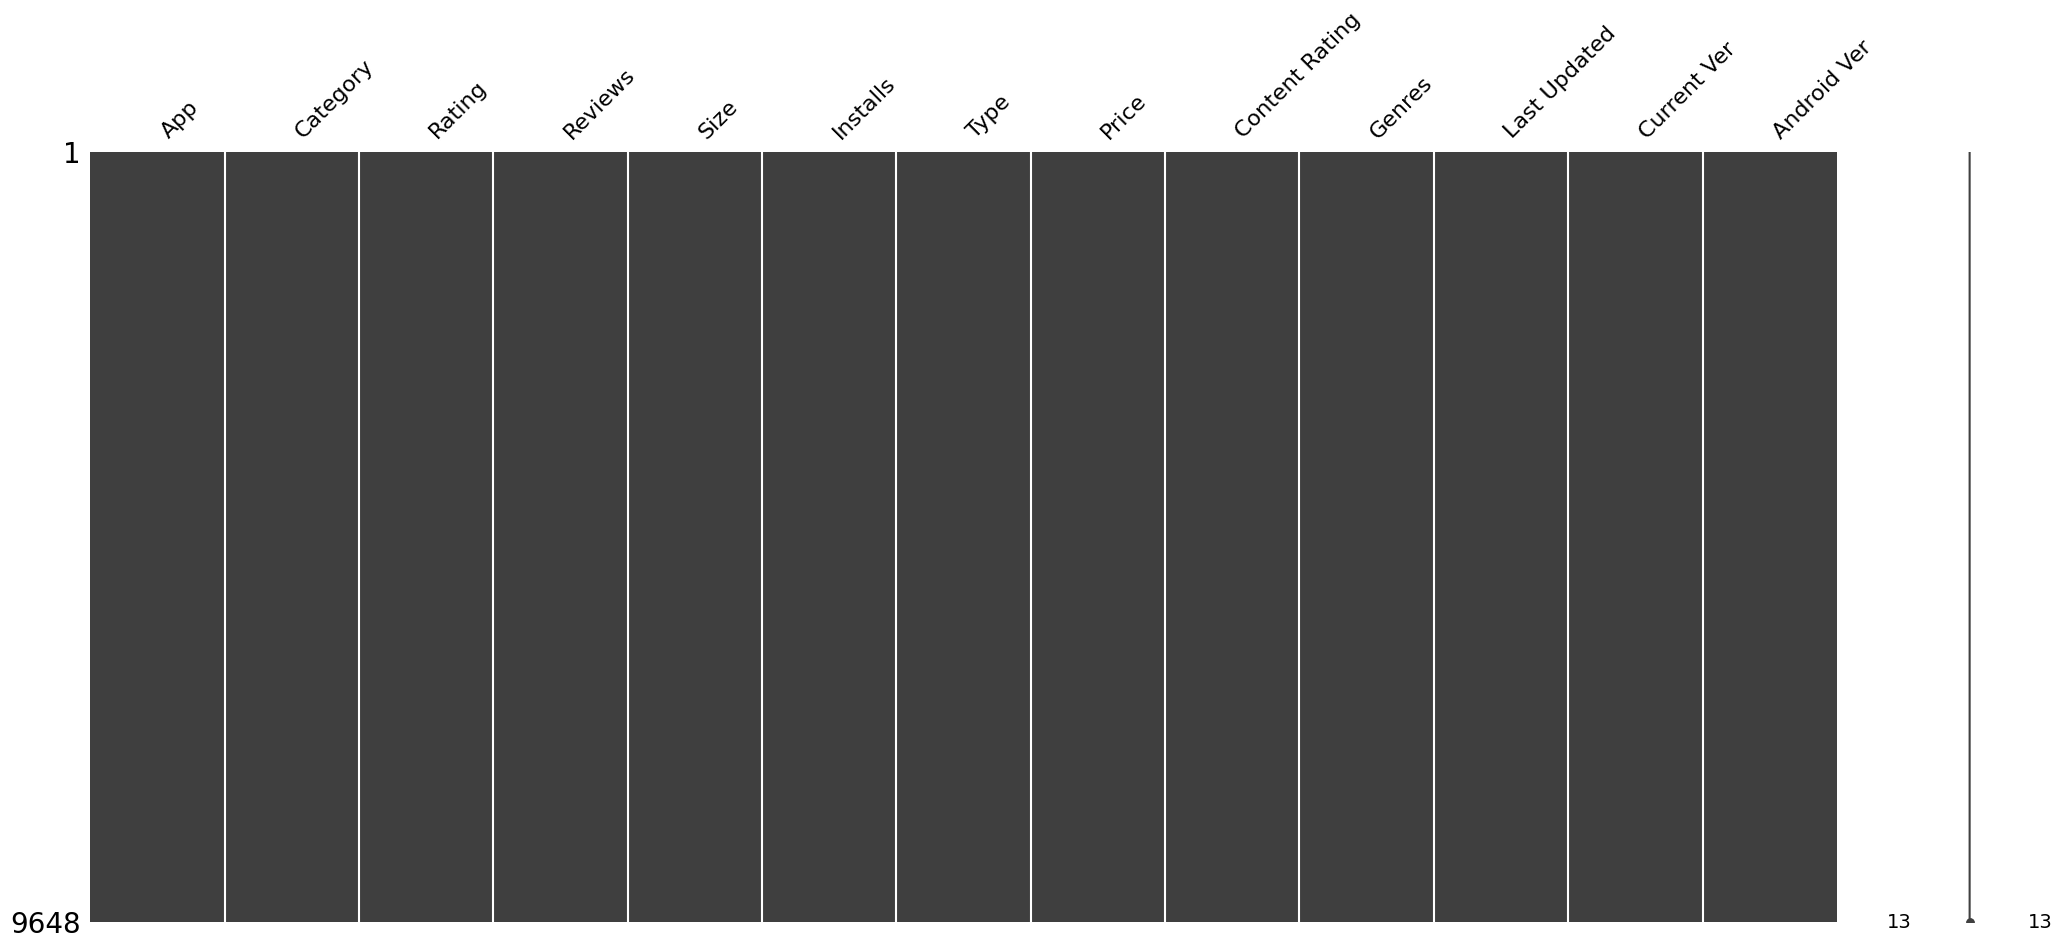

In [64]:
import missingno as msno
msno.matrix(df1)
plt.show()

Showing that there is no missing value left in the data and that it is more presentable and suitable for analysis.

**# So, We sucessfully handled the Null values that was present in our dataset**

# **Lets analyze and clean our 2nd dataset**


In [65]:
# FINDING THE TOTAL NUMBER OF NaN VALUES IN EACH COLUMN
df2.isnull().sum()


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [66]:
#Dropping/Deleting the duplicate values in user rewiews dataset
#Keeping only non-null rows
df2 =df2[~df2['Translated_Review'].isnull()]
df2.shape

(37427, 5)

We are going to remove those rows which have missing 'Translated_Review'.

In [67]:
#Checking for duplicates
df2.duplicated().sum()

7735

In [68]:
#Removing duplicates
df2 = df2.drop_duplicates().reset_index(drop=True)

In [69]:
df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
29687,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
29688,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
29689,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
29690,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [70]:
# FINDING THE SHAPE OF THE UPDATED DATASET
df2.shape

(29692, 5)

In [71]:
# FINDING THE TOTAL NUMBER OF NaN VALUES IN EACH COLUMN
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [72]:
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
29687,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
29688,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
29689,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
29690,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


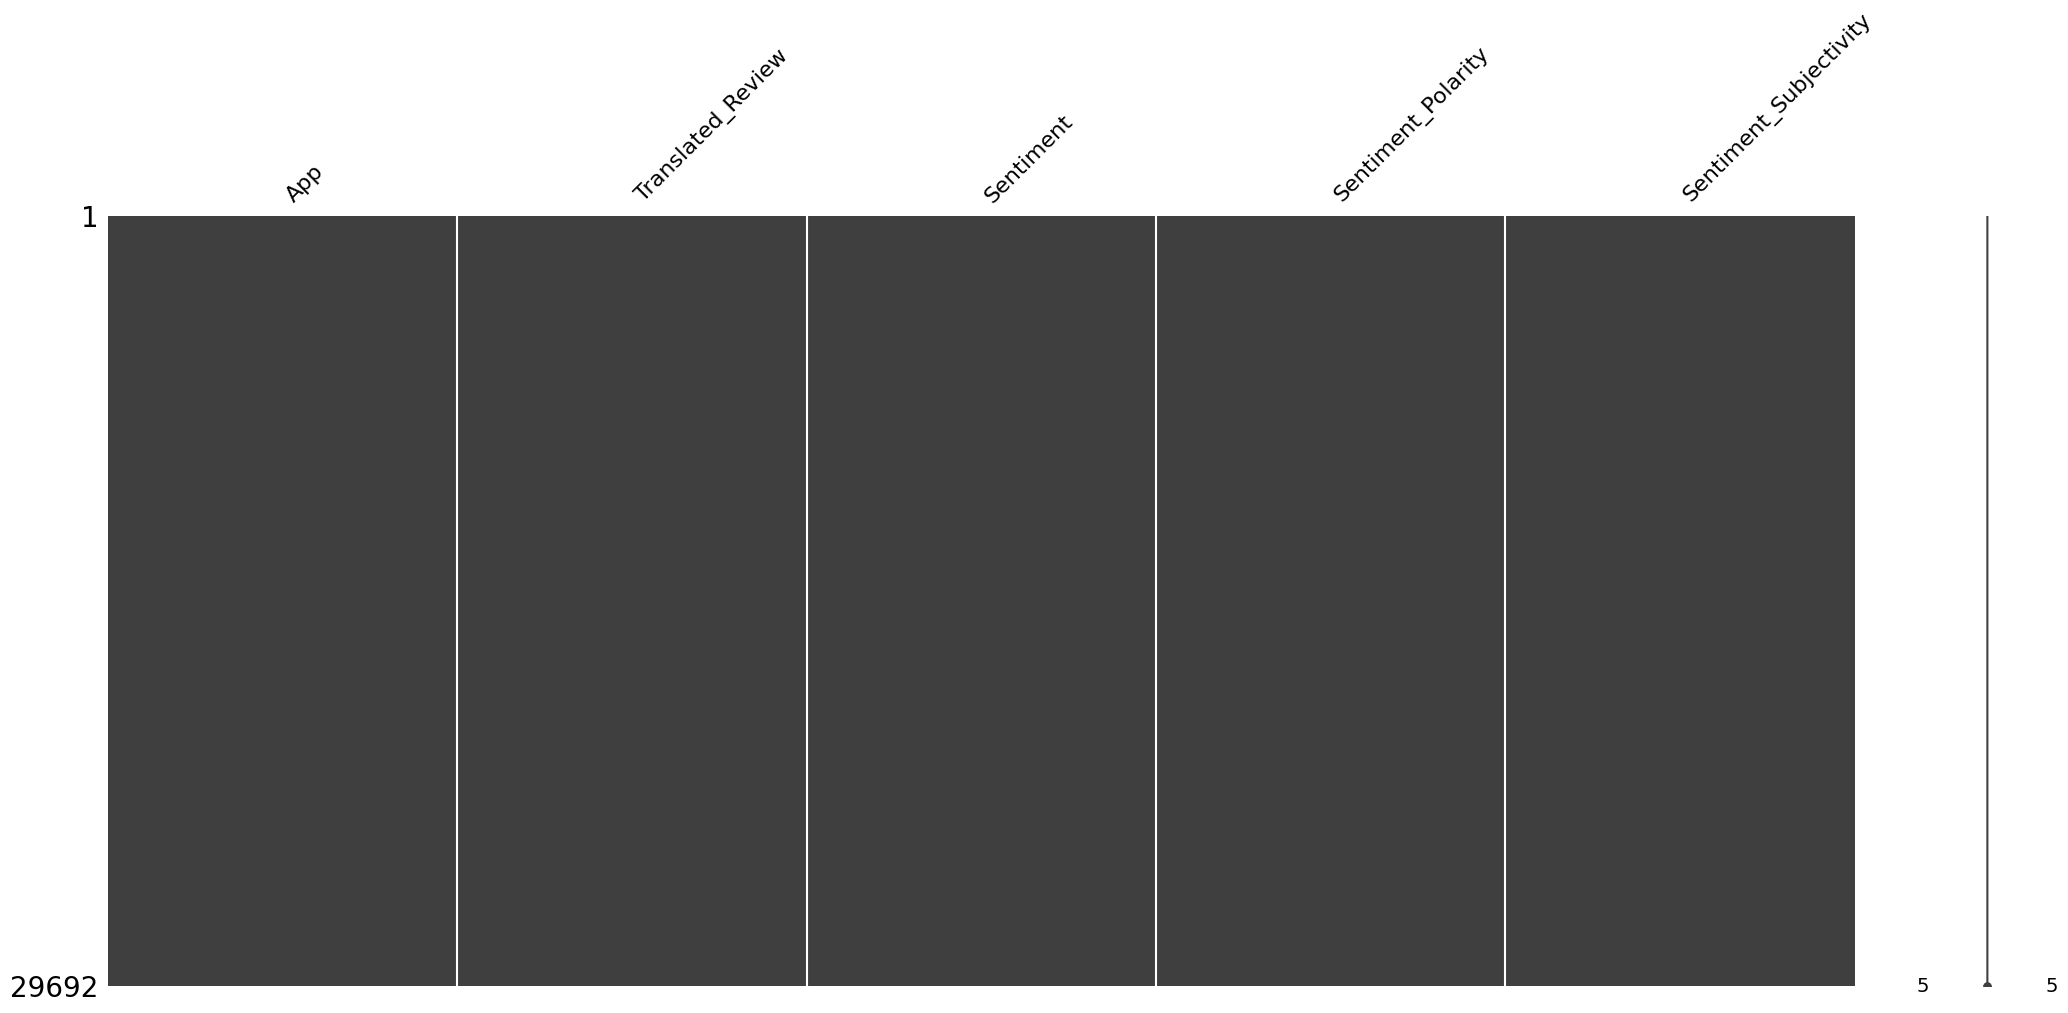

In [73]:
msno.matrix(df2)
plt.show()

This shows that the missing data in the User Data has been removed successfully

## **Merging dataframes on apps**

In [74]:
# MERGING THE TWO DATASETS TO GET THE FINAL ONE

df = df1.merge(df2, on="App")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,Works great especially going grocery store,Positive,0.400000,0.875000
3,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,Best idea us,Positive,1.000000,0.300000
4,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28245,Housing-Real Estate & Property,LIFESTYLE,4.1,28301,0.0,1000000,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
28246,Housing-Real Estate & Property,LIFESTYLE,4.1,28301,0.0,1000000,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
28247,Housing-Real Estate & Property,LIFESTYLE,4.1,28301,0.0,1000000,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
28248,Housing-Real Estate & Property,LIFESTYLE,4.1,28301,0.0,1000000,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In the merged dataframe, we have four new columns i.e.. Translated_Review, Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1]

In [75]:
df.shape

(28250, 17)

# **We successfully completed the data cleaning process. Let us now deep dive into Data Exploration and Visualization to gather important insights from our dataset.**

# **Data Exploration--Univariate & Bivariate Analysis**

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features



/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

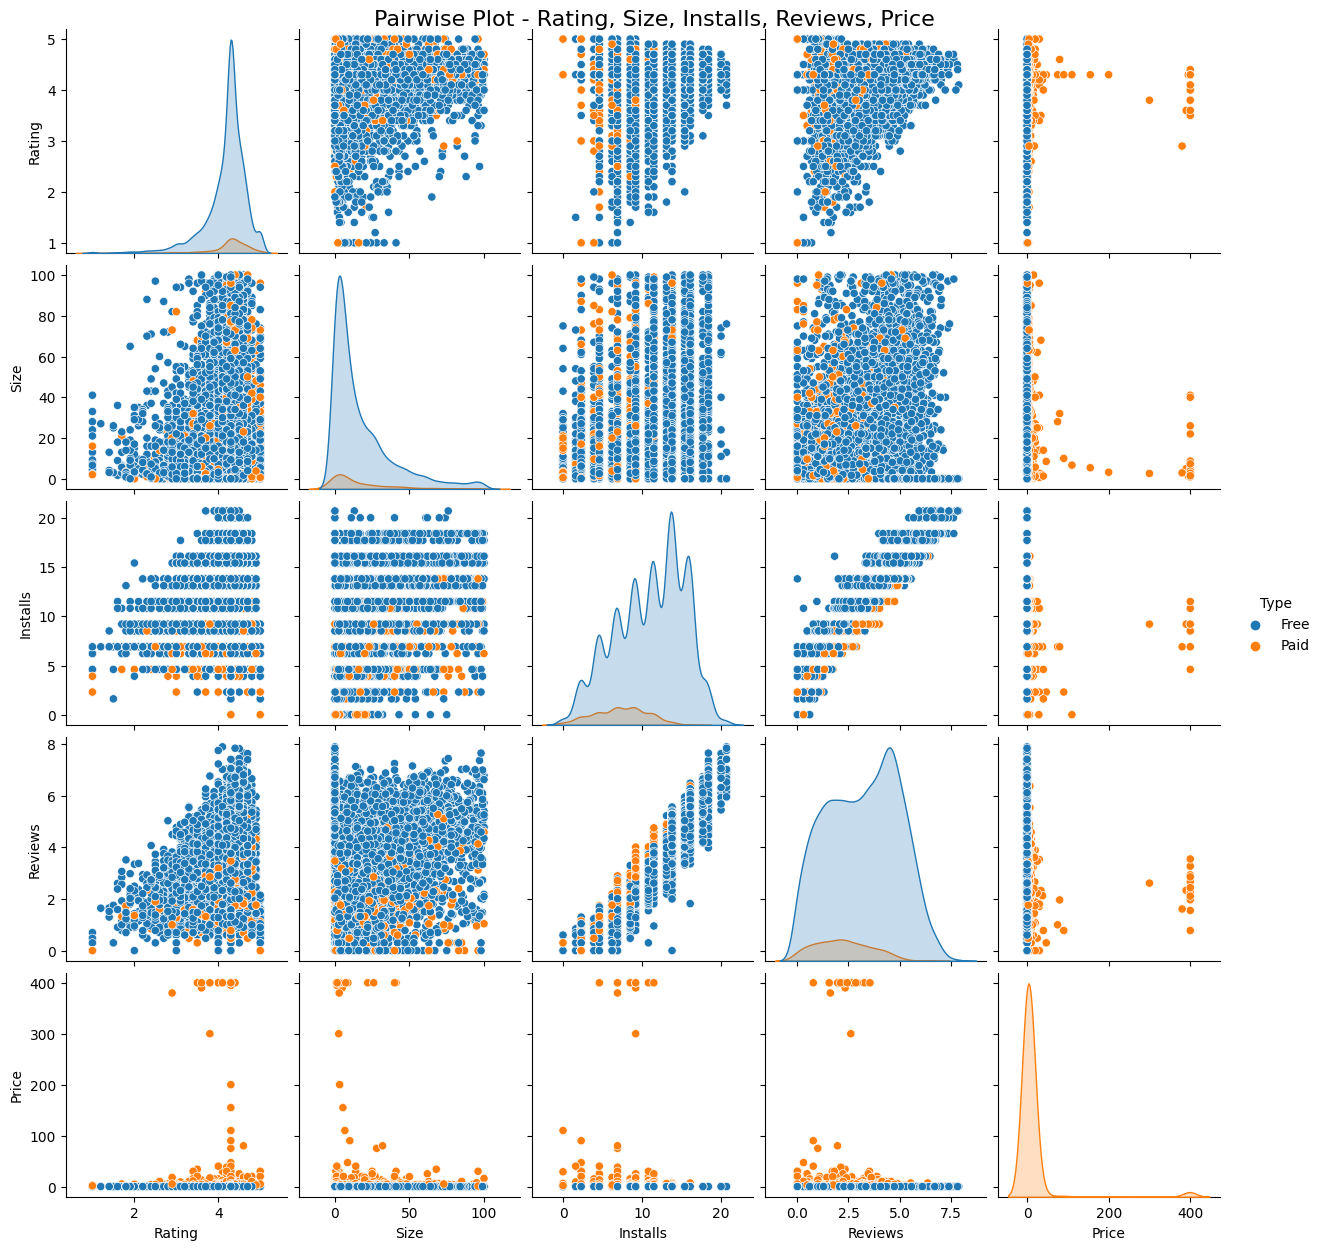

In [76]:
#PLOTTING A PAIRWISE PLOT TO LOOK FOR ANY RELATIONSHIP
Rating = df1['Rating']
Size = df1['Size']
Installs = df1['Installs']
Reviews = df1['Reviews']
Type = df1['Type']
Price = df1['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)
#plt.savefig('relationship_pairplot.png') #saving the chart for presentation

**FINDINGS**

* Most of the App are Free.

* Most of the Paid Apps have Rating around 4
As the number of installation increases the number of reviews of the particaular app also increases.

* Most of the Apps are light-weighted

In [77]:
df.corr()

<ipython-input-77-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.042570,0.059140,0.026649,-0.013171,0.111277,0.075159
Reviews,0.042570,1.000000,0.083848,0.628468,-0.015334,-0.068875,-0.004947
Size,0.059140,0.083848,1.000000,-0.034121,0.011581,-0.100761,0.015459
Installs,0.026649,0.628468,-0.034121,1.000000,-0.020184,-0.052880,-0.004725
Price,-0.013171,-0.015334,0.011581,-0.020184,1.000000,0.021172,-0.000417
Sentiment_Polarity,0.111277,-0.068875,-0.100761,-0.052880,0.021172,1.000000,0.271602
Sentiment_Subjectivity,0.075159,-0.004947,0.015459,-0.004725,-0.000417,0.271602,1.000000


<ipython-input-78-a1071bb9e5d7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True,cmap='ocean')


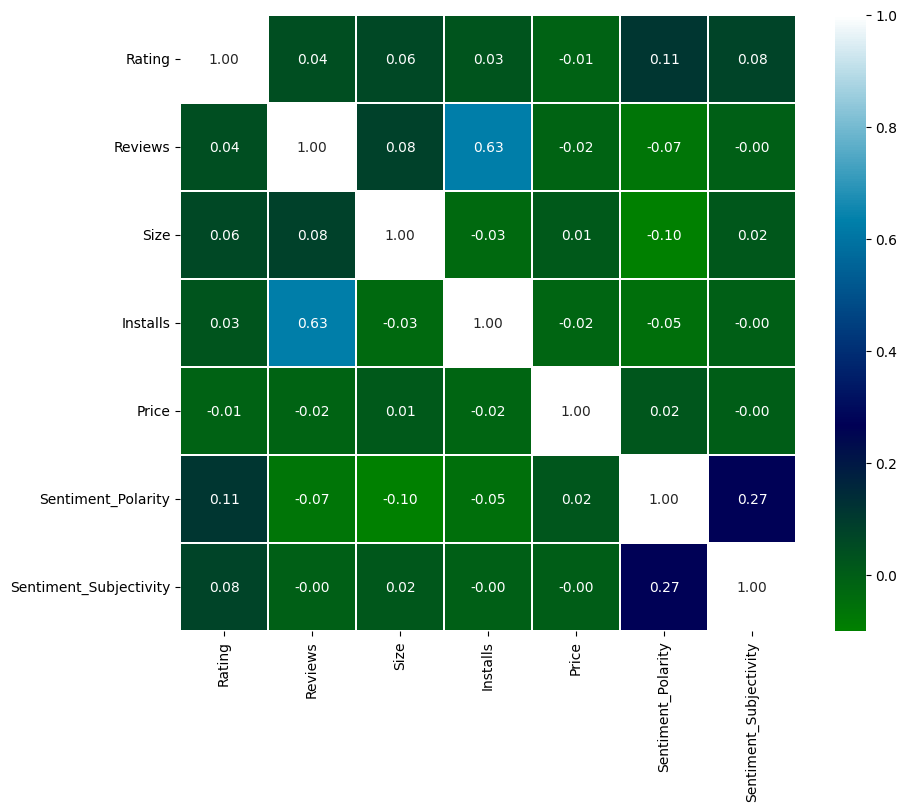

In [78]:
# Heatmap for cheking correlation between columns in Playstore DataFrame. 
fig, axes =plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True,cmap='ocean')
plt.show()
#plt.savefig('ps_heatmap.png')

Number of Reviews is highly correlated with the number of Installs of the application

In [79]:

df2.corr()

<ipython-input-79-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.272284
Sentiment_Subjectivity,0.272284,1.000000


<ipython-input-80-4c779c0e32cf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df2.corr()


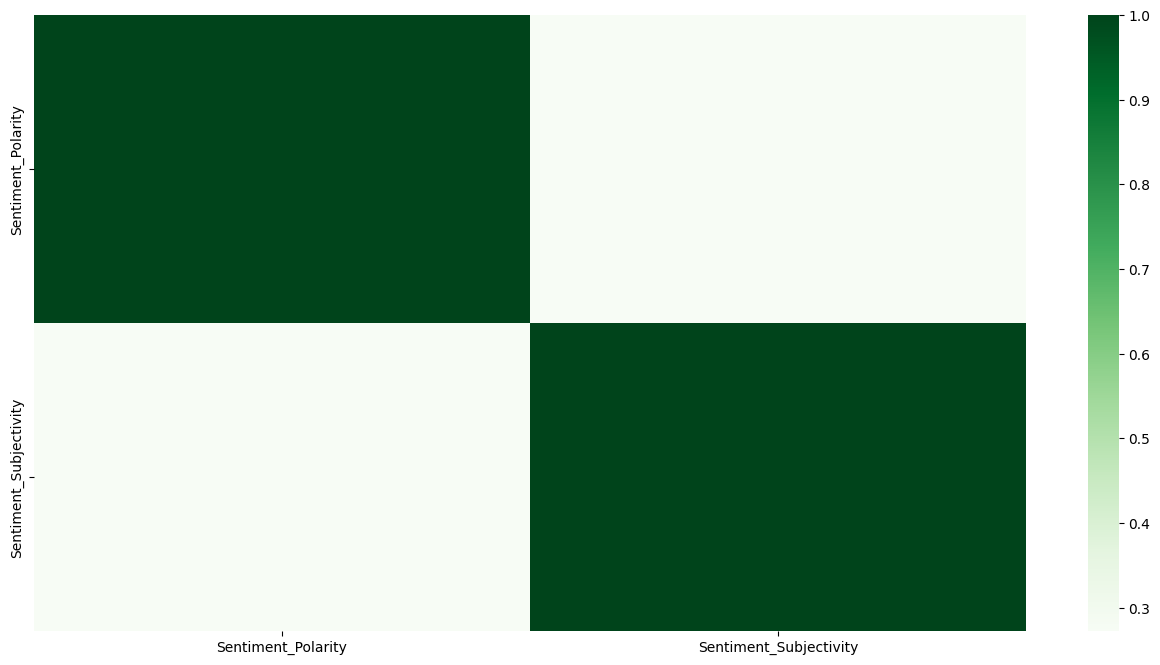

In [80]:
# Heat map for user_review
plt.figure(figsize=(16,8))
corr= df2.corr()
sns.heatmap(corr,cmap='Greens')
plt.show()
     

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart - 1
**Find out the number of Apps per category.**

In [81]:
# GROUPING THE NUMBER OF APPS BY CATEGORY
app_count_per_category = df1.groupby(['Category'])['App'].count().sort_values(ascending= False)
count_df=pd.DataFrame(app_count_per_category)
count_df

,App
Category,
FAMILY,1870
GAME,946
TOOLS,827
BUSINESS,420
MEDICAL,395
PRODUCTIVITY,374
PERSONALIZATION,374
LIFESTYLE,369
FINANCE,345


<Axes: xlabel='Category'>

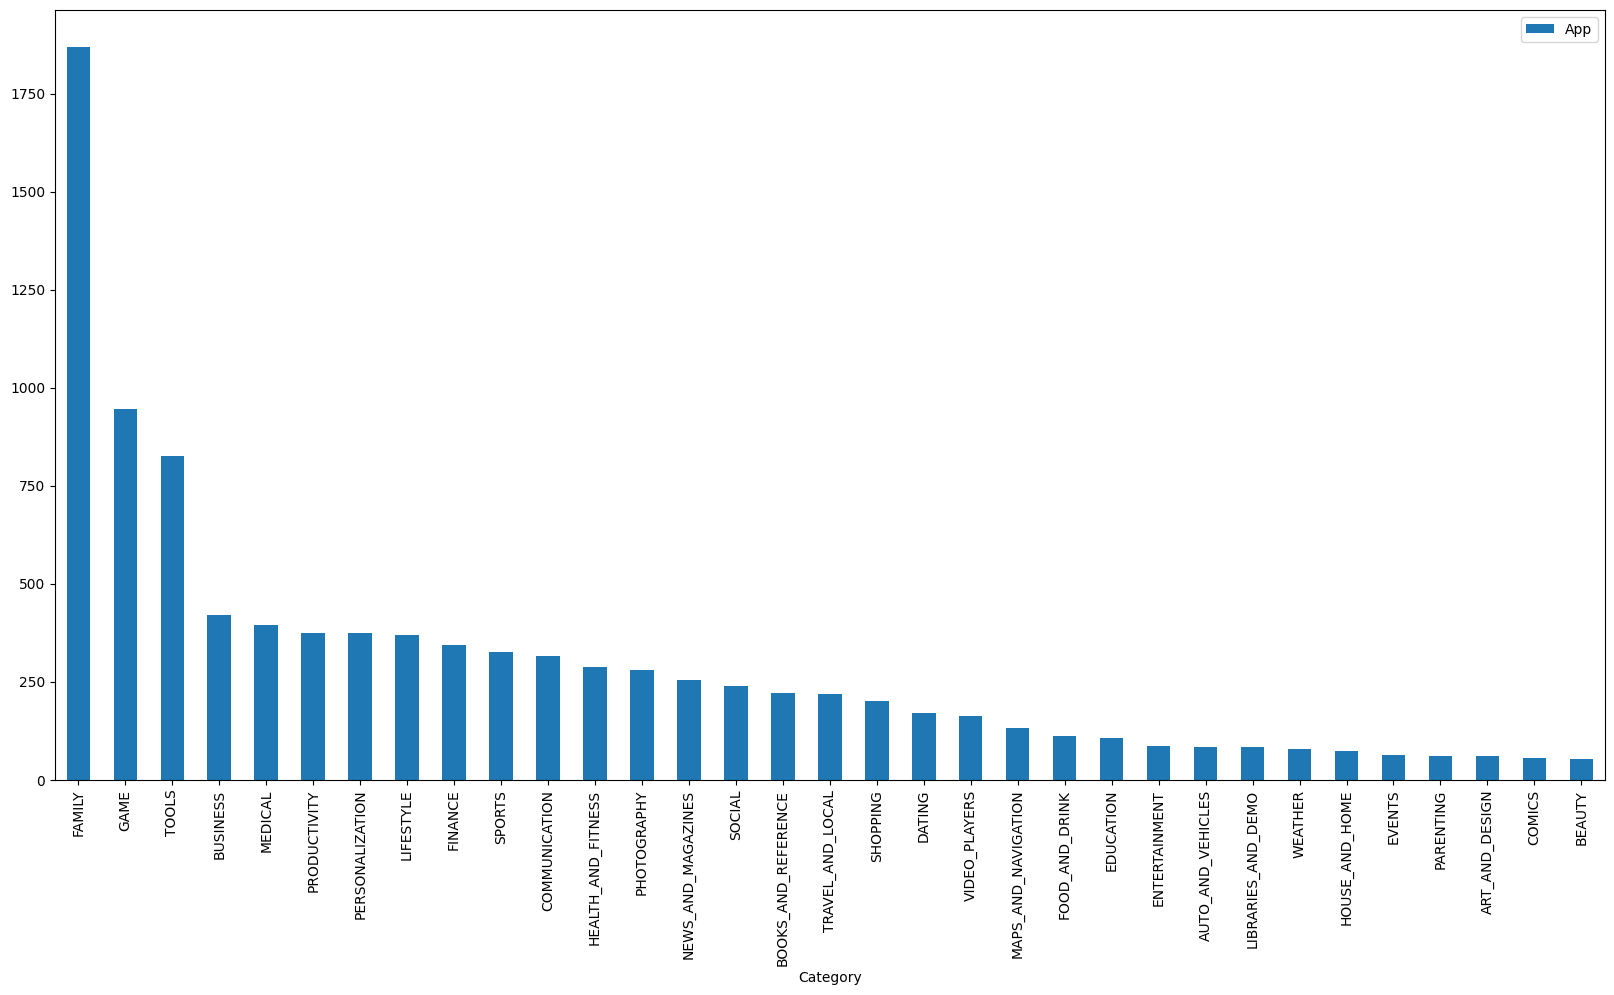

In [82]:
# SETTING THE SIZE OF THE GRAPH
plt.rcParams['figure.figsize'] = (20, 10)

# PLOTTING THE BAR GRAPH
count_df.plot(kind='bar')
#plt.savefig('most_apps_per_category.png')

**Findings**

* The above bar graph represents the distribution of number of apps in different categories in the Play Store. It can be infered that FAMILY Category has the maximum number of Apps.

#### Chart - 2
**Which category of App has more installs?**

In [83]:
# unique values in installs
df['Installs'].unique()

array([    500000,   10000000,    1000000,     100000,   50000000,
            10000,  100000000,    5000000,      50000,  500000000,
             1000, 1000000000])

In [87]:
# grouping by category
grouping=df.groupby('Category')

# taking sum of installs values of each category
group_install=grouping.Installs.sum()

Text(0, 0.5, 'Installs--->')

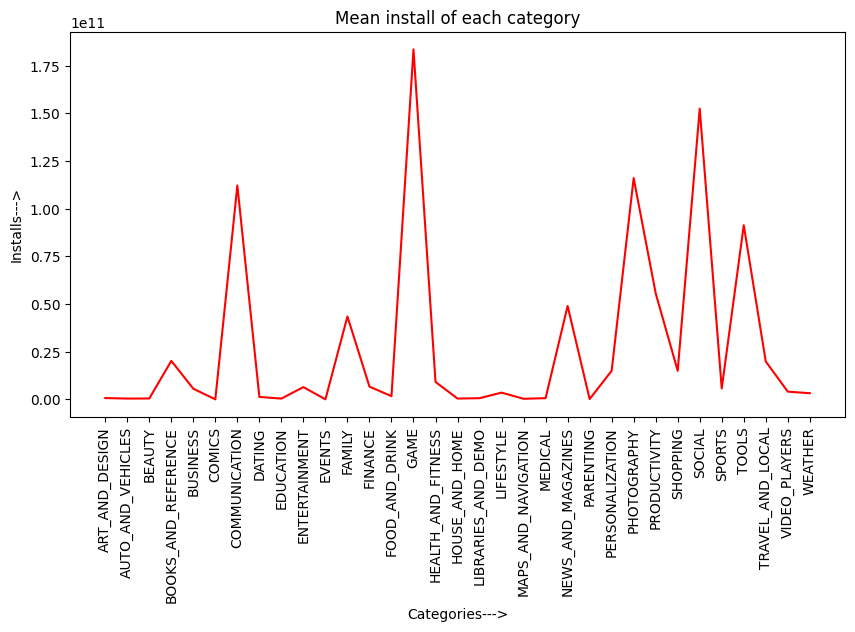

In [85]:
# line plot
plt.figure(figsize=(10,5))
plt.plot(group_install, color='r')
plt.xticks(rotation=90)
plt.title('Mean install of each category')
plt.xlabel('Categories--->')
plt.ylabel('Installs--->')

**Findings**

The Top 5 Categories according to number of installes are:-

* Game
* Communication
* Tools
* Productivity
* Social

When it comes to which categories have highest number of installs, the answer is a little bit different from the previous analysis. In this case, 'Game', and 'Communication' have topped the list. They have more number of installs compared to any other category.

#### Chart - 3
**Which category of App is most popular on Play store based on Ratings**

In [98]:
# Taking mean of rating , rewiews , price for each category
group_rating=grouping.Rating.mean()
group_review=grouping.Reviews.mean()
group_Price=grouping.Price.mean()

#printing mean values
print(group_rating)
print(group_Price)
print(group_review)

Category
ART_AND_DESIGN         4.358683
AUTO_AND_VEHICLES      4.579505
BEAUTY                 4.263722
BOOKS_AND_REFERENCE    4.369854
BUSINESS               4.255556
COMICS                 4.311111
COMMUNICATION          4.240702
DATING                 4.079577
EDUCATION              4.172447
ENTERTAINMENT          4.097290
EVENTS                 4.335256
FAMILY                 4.338205
FINANCE                4.252844
FOOD_AND_DRINK         4.368611
GAME                   4.442615
HEALTH_AND_FITNESS     4.405367
HOUSE_AND_HOME         4.141573
LIBRARIES_AND_DEMO     4.055422
LIFESTYLE              4.190048
MAPS_AND_NAVIGATION    4.318519
MEDICAL                4.130796
NEWS_AND_MAGAZINES     4.242838
PARENTING              4.251563
PERSONALIZATION        4.339438
PHOTOGRAPHY            4.307947
PRODUCTIVITY           4.352511
SHOPPING               4.227273
SOCIAL                 4.134947
SPORTS                 4.278947
TOOLS                  4.242275
TRAVEL_AND_LOCAL       4.290458

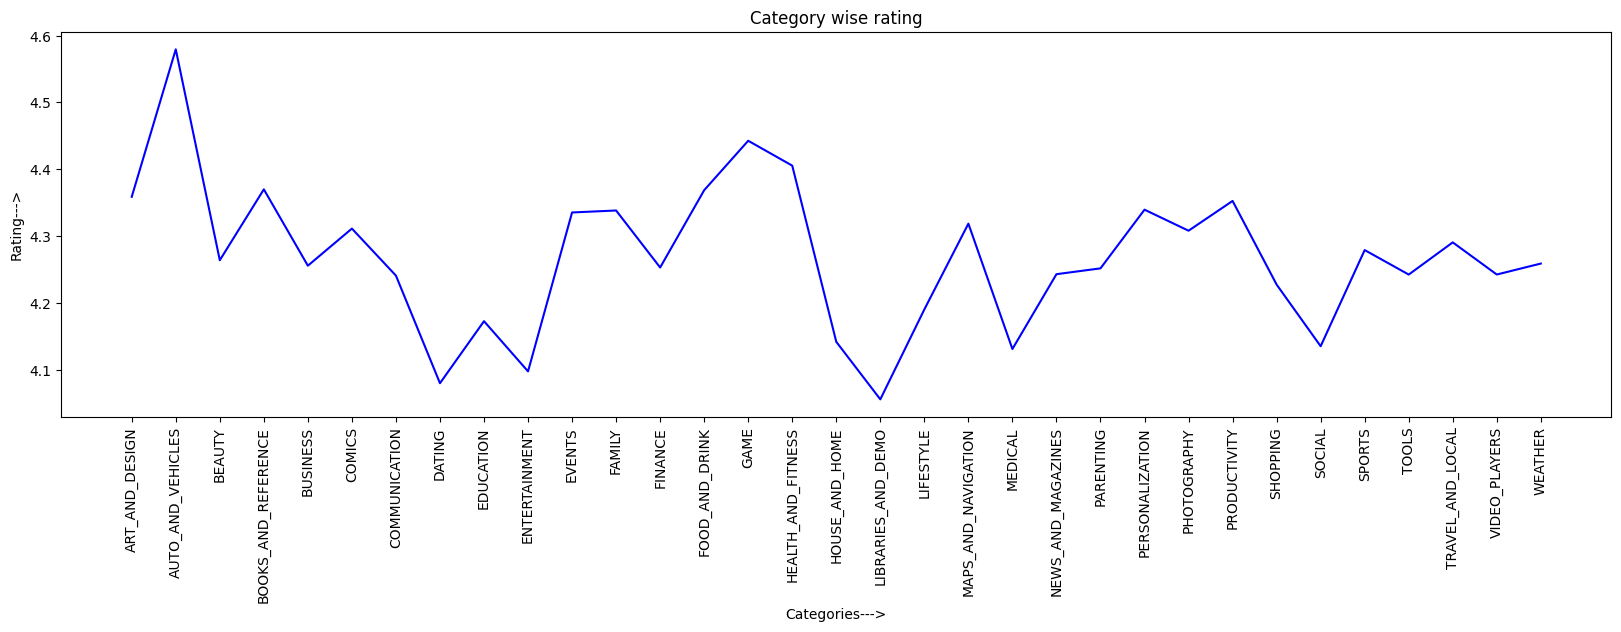

In [99]:
# A line plot of average rating of each category of App

plt.figure(figsize=(20,5))
plt.plot(group_rating,color='b')
plt.xticks(rotation=90)
plt.title('Category wise rating')
plt.xlabel('Categories--->')
plt.ylabel('Rating--->')
plt.show()

**Findings**

* Rating is highest for Family and Game category apps.
* Rating is low for Events and Beauty category apps

#### Chart - 4
**Number of Reviews per Category**


<ipython-input-107-956700649a5f>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(group_review, 'r--', color = 'g')


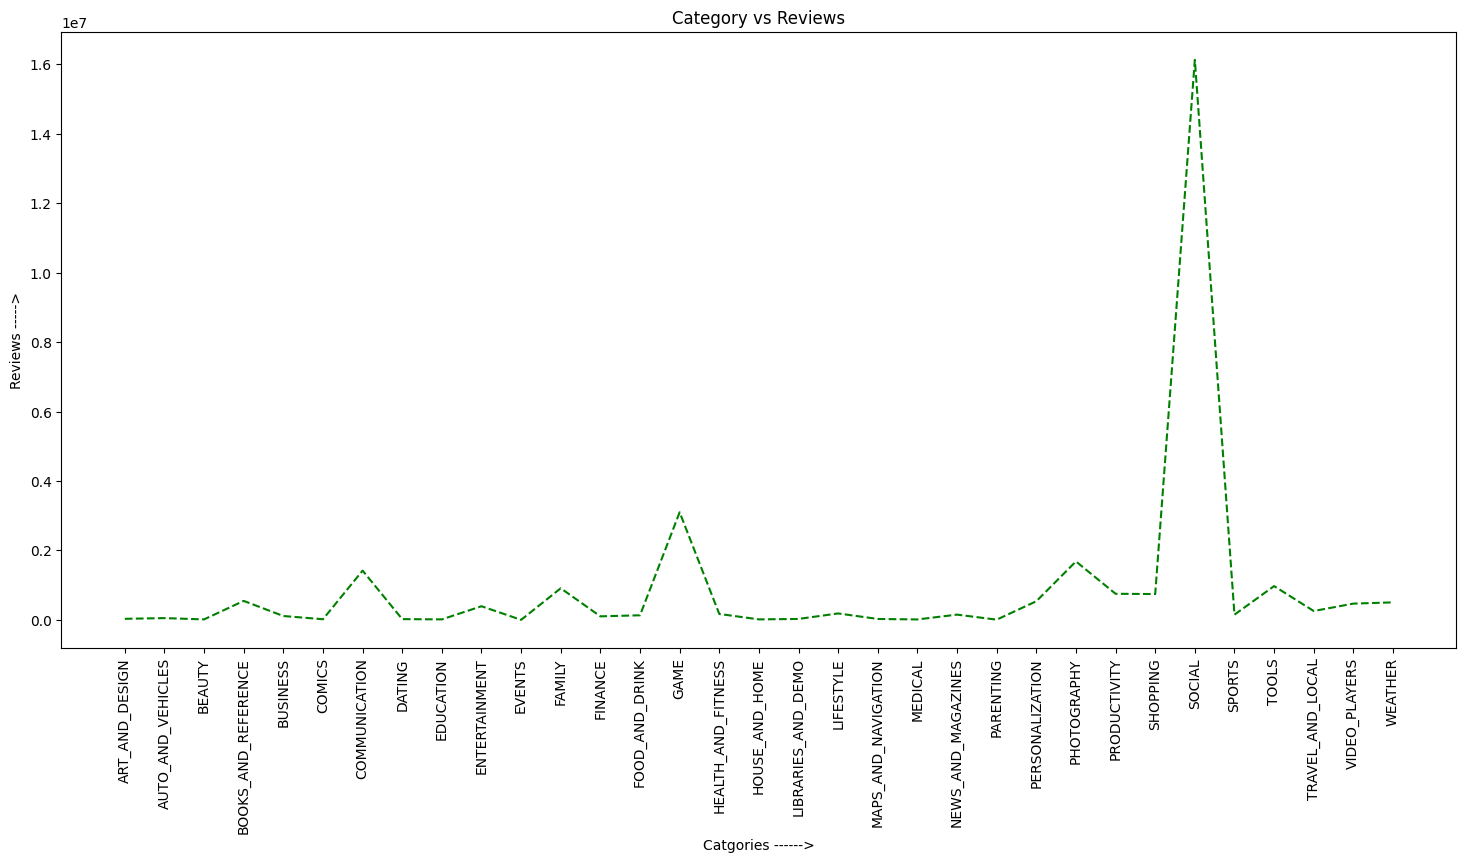

In [107]:
 
plt.figure(figsize = (18,8))
plt.plot(group_review, 'r--', color = 'g')
plt.xticks(rotation = 90)
plt.title('Category vs Reviews')
plt.xlabel('Catgories ------>')
plt.ylabel('Reviews ----->');

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***